In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("./metadata.csv")
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Path,Vertices,CenterOfMass,Means,Scaling,AverageSize,DiagonalSize,Bounds,Position,Cells,Class,Type,Eigenvalue,Eigenvectors
0,0,0,0,../shapes\AircraftBuoyant\m1337.obj,201,[0.45806434 0.51589742 0.45660967],[0.45806432 0.5158974 0.45660958],[1. 1. 1.],0.440347,1.547999,[0.025 0.889234 0.025 0.975 0.025 ...,[0. 0. 0.],340,AircraftBuoyant,Triangle,[0.10504596 0.04645249 0.04645206],[[ 1.37933137e-03 -8.60535996e-01 5.09387767e...
1,1,1,1,../shapes\AircraftBuoyant\m1338.obj,8761,[0.47991081 0.54983541 0.48093688],[0.4799102 0.5498328 0.48093763],[1. 1. 1.],0.435180,1.600143,[0.025 0.933058 0.025 0.975 0.025 ...,[0. 0. 0.],16960,AircraftBuoyant,Triangle,[0.09733962 0.04685405 0.04683994],[[ 1.08941545e-03 -9.99859181e-01 1.67460613e...
2,2,2,2,../shapes\AircraftBuoyant\m1339.obj,1878,[0.31299033 0.35299274 0.32617148],[0.3129901 0.35299188 0.32617152],[1. 1. 1.],0.231941,1.266288,[0.025 0.607072 0.025 0.975 0.025 ...,[0. 0. 0.],6173,AircraftBuoyant,Triangle,[0.06554274 0.00866799 0.00892623],[[ 0.00532142 0.9999363 0.00995386]\n [ 0.9...
3,3,3,3,../shapes\AircraftBuoyant\m1340.obj,778,[0.19554008 0.3116706 0.1938877 ],[0.19553997 0.31167057 0.19388752],[1. 1. 1.],0.253495,1.066475,[0.025 0.367686 0.025 0.975 0.025 ...,[0. 0. 0.],1457,AircraftBuoyant,Triangle,[0.08524597 0.00322742 0.00317761],[[ 0.00116887 0.99997913 -0.00635391]\n [ 0.9...
4,4,4,4,../shapes\AircraftBuoyant\m1341.obj,425,[0.20235557 0.39406215 0.20228764],[0.20235543 0.39406213 0.2022876 ],[1. 1. 1.],0.279199,1.074219,[0.025 0.379575 0.025 0.975 0.025 ...,[0. 0. 0.],824,AircraftBuoyant,Triangle,[0.08771655 0.00299744 0.00286422],[[-2.07843352e-04 -9.99999978e-01 1.48961295e...


In [14]:
df.groupby("Class")["Vertices"].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
AircraftBuoyant,16.0,2509.125000,3508.938261,178.0,664.50,1095.0,3084.75,12987.0
Apartment,23.0,11924.043478,14774.867369,1294.0,3246.50,8301.0,14143.50,73184.0
AquaticAnimal,29.0,4215.689655,6764.435734,44.0,298.00,553.0,4117.00,19505.0
Bed,27.0,5356.925926,5947.737275,363.0,737.00,2644.0,7667.00,22063.0
Bicycle,26.0,15401.692308,14395.489668,436.0,2769.00,11683.5,23218.25,56754.0
...,...,...,...,...,...,...,...,...
TruckNonContainer,20.0,5646.500000,2320.857838,2288.0,4376.25,5238.5,7012.25,11914.0
Vase,20.0,970.950000,1184.324390,32.0,282.25,453.0,1075.50,4578.0
Violin,20.0,3357.400000,2371.412113,466.0,1471.50,2647.5,4190.50,7672.0


In [27]:
# Create bins for the "Vertices" column
df['Vertices_bin'] = pd.qcut(df['Vertices'], q=3, duplicates='drop')

# Group the DataFrame by the "Class" and "Vertices_bin" columns
grouped = df.groupby(['Class', 'Vertices_bin'])

# Create a representative subset (adjust the sample size as needed)
subset = grouped.apply(lambda x: x.sample(min(len(x), 2))).reset_index(drop=True)

/tmp/ipykernel_13592/332038787.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Class', 'Vertices_bin'])
/tmp/ipykernel_13592/332038787.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subset = grouped.apply(lambda x: x.sample(min(len(x), 2))).reset_index(drop=True)


In [37]:
subset[["Class", "Vertices"]].groupby("Class").describe().describe()

Vertices                                                        \
           count          mean           std          min          25%   
count  69.000000     69.000000     69.000000    69.000000    69.000000   
mean    5.681159   5144.236957   6609.391317   442.869565   948.927536   
std     0.629957   3539.182461   6282.448146   587.733931   784.906070   
min     4.000000    815.250000    726.468341    50.000000   226.750000   
25%     6.000000   3038.166667   2880.792096   173.000000   576.000000   
50%     6.000000   4235.833333   4228.237667   270.000000   681.000000   
75%     6.000000   5881.833333   8093.281304   454.000000  1000.750000   
max     6.000000  20871.250000  34909.109369  3155.000000  3860.750000   

                                                
               50%           75%           max  
count    69.000000     69.000000     69.000000  
mean   2289.246377   7142.083333  16075.333333  
std    1051.609745   5539.910630  14101.220186  
min     725.000000    886.000000   1645.000000  
25%    1529.000000   4604.750000   7226.000000  
50%    2024.500000   5699.500000  10889.000000  
75%    2769.000000   7350.000000  19417.000000  
max    5731.500000  34683.750000  73184.000000

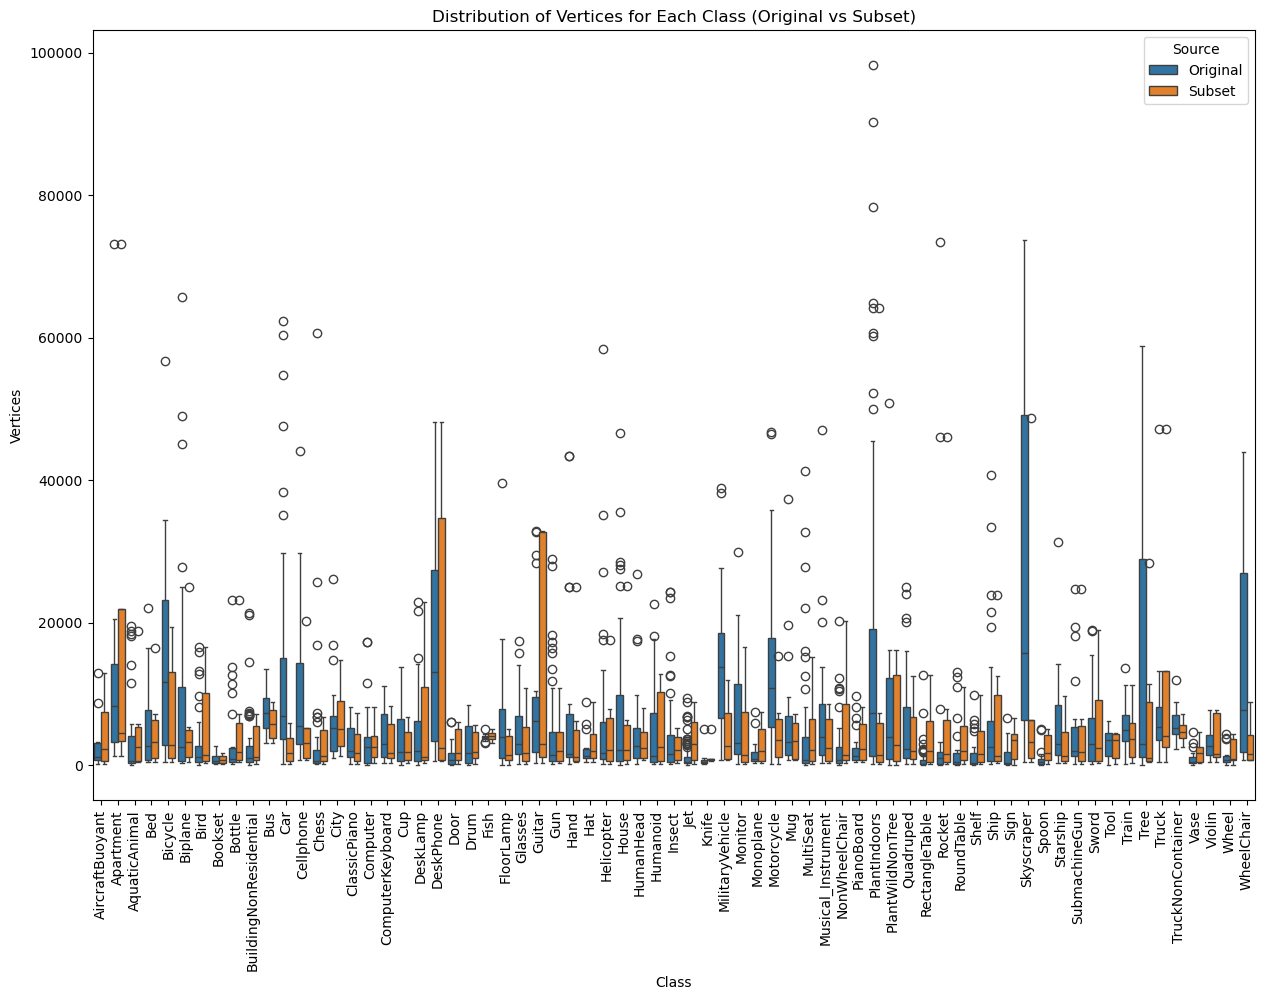

In [35]:
# Add a column to each DataFrame to indicate the source
df['Source'] = 'Original'
subset['Source'] = 'Subset'

# Combine the two DataFrames
combined_df = pd.concat([df, subset])

# Create the side-by-side boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(x='Class', y='Vertices', hue='Source', data=combined_df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Vertices for Each Class (Original vs Subset)')
plt.xlabel('Class')
plt.ylabel('Vertices')
plt.xticks(rotation=90)  # Rotate class labels for better readability
plt.legend(title='Source')
plt.show()


In [38]:
subset.to_csv('subset_metadata.csv', index=False)

In [41]:
subset.shape

(392, 19)